In [1]:
import sys
sys.path.append("../")

from skimage.io import imread, imsave
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from analyser.celltracer import CellTracer
from analyser.cell import Cell
from analyser.mask_feature import MaskFeature
%load_ext autoreload
%autoreload 2

##### load image and mask

In [3]:
movie = imread("../../data_test/YAV2104xYAV2105_005_13_R3D.dv.tif")
mask = imread("../../data_test/mask_YAV2104xYAV2105_005_13_R3D.tif").astype(np.int16)

In [4]:
ter = CellTracer(mask)

#### tracing

In [16]:
out = ter.tracing(max_age=2, min_hits=0,iou_threshold=0.6)
p3d, coords = ter.features_to_3dmatrix()
ter.connect_generation()
tracingdata = ter.update_traced_image()

100%|█████████████████████████████████████████████| 50/50 [00:02<00:00, 16.78it/s]


In [6]:
pred = ter.prediction(movie, n_components=3)

100%|█████████████████████████████████████████████| 50/50 [00:01<00:00, 30.55it/s]


In [7]:
distance = ter.distance_3d()

100%|█████████████████████████████████████████████| 50/50 [00:28<00:00,  1.75it/s]


In [9]:
son, mated = ter.fusion_cell_features()

#### show result

In [10]:
ter.obj_property

,identity,generation,start_time,end_time,mother,father,is_divided,daughter_1,daughter_2,is_fusioned,spouse,son,life_time,arg,channel_prediction
31,31,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0,3.0
30,30,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,1,3.0
29,29,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,2,1.0
28,28,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,3,1.0
27,27,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,4,1.0
26,26,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,5,2.0
25,25,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,6,2.0
24,24,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,7,1.0
23,23,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,8,1.0
22,22,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,9,1.0


In [11]:
ter.trace_calendar

,frame_000,frame_001,frame_002,frame_003,frame_004,frame_005,frame_006,frame_007,frame_008,frame_009,...,frame_040,frame_041,frame_042,frame_043,frame_044,frame_045,frame_046,frame_047,frame_048,frame_049
31,3002.0,3002.0,3002.0,3002.0,3002.0,3002.0,3002.0,3002.0,3002.0,3002.0,...,3002.0,3002.0,3003.0,3003.0,3003.0,2001.0,3003.0,2001.0,3003.0,2001.0
30,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,3001.0,...,3001.0,3001.0,3002.0,3002.0,3002.0,3002.0,3002.0,3002.0,3002.0,3002.0
29,1037.0,1036.0,1036.0,1037.0,1037.0,1037.0,1036.0,1037.0,1037.0,1037.0,...,1038.0,1036.0,1037.0,1035.0,1036.0,1036.0,1037.0,1037.0,1038.0,1036.0
28,1034.0,1034.0,1035.0,1034.0,1034.0,1034.0,1034.0,1034.0,1034.0,1034.0,...,1035.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1033.0,1034.0,1033.0
27,1032.0,1033.0,1032.0,1032.0,1032.0,1033.0,1032.0,1032.0,1032.0,1032.0,...,1033.0,1032.0,1032.0,1032.0,1032.0,1032.0,1032.0,1032.0,1033.0,1032.0
26,1031.0,1031.0,1031.0,1031.0,1031.0,1031.0,NaN,1031.0,1031.0,1031.0,...,1031.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1031.0,1030.0
25,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,...,1030.0,1029.0,1029.0,1029.0,1029.0,1029.0,1029.0,1029.0,1030.0,1029.0
24,1028.0,1028.0,1028.0,1028.0,1028.0,1028.0,1028.0,1028.0,1028.0,1028.0,...,1028.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1028.0,1027.0
23,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,...,1026.0,1026.0,1026.0,1026.0,1026.0,1026.0,1026.0,1026.0,1027.0,1026.0
22,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,...,1025.0,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0


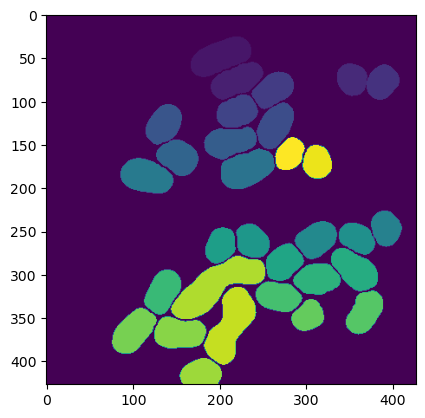

In [12]:
plt.imshow(ter.traced_image[40])

100%|███████████████████████████████████████████| 50/50 [00:31<00:00,  1.58it/s]


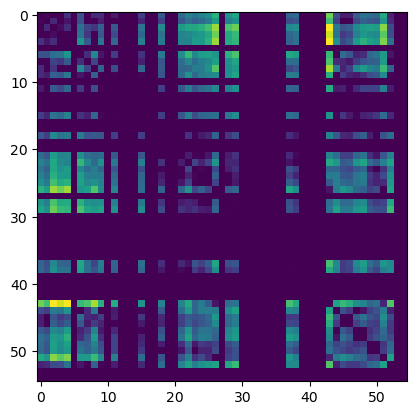

In [18]:
plt.imshow(distance[36,:,:,1])

In [19]:
ter.fusioned_cell_features()

55


AttributeError: 'Series' object has no attribute 'pred'

In [20]:
ter.cell_property

,identity,generation,start_time,end_time,mother,father,is_divided,daughter_1,daughter_2,is_fusioned,spouse,son,life_time,arg
31,31,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0
30,30,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,1
29,29,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,2
28,28,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,3
27,27,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,4
26,26,1,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,5
25,25,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,6
24,24,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,7
23,23,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,8
22,22,1,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,9


In [ ]:
ter.cell_property.loc[(~self.cell_property.mother.isna()) & (~self.cell_property.father.isna())].copy()


In [156]:
ter.distance.shape

(50, 55, 55, 2)

In [165]:
ter.fusion_cell_features()

55


AttributeError: 'Series' object has no attribute 'pred'

In [161]:
ter.distance

array([[[[  0.        ,   0.        ],
         [ 47.98415663,   5.03092927],
         [ 64.17515075,   2.54950976],
         ...,
         [  0.        ,   0.        ],
         [  0.        ,   0.        ],
         [  0.        ,   0.        ]],

        [[ 47.98415663,   5.03092927],
         [  0.        ,   0.        ],
         [101.7910834 ,  47.77315395],
         ...,
         [  0.        ,   0.        ],
         [  0.        ,   0.        ],
         [  0.        ,   0.        ]],

        [[ 64.17515075,   2.54950976],
         [101.7910834 ,  47.77315395],
         [  0.        ,   0.        ],
         ...,
         [  0.        ,   0.        ],
         [  0.        ,   0.        ],
         [  0.        ,   0.        ]],

        ...,

        [[  0.        ,   0.        ],
         [  0.        ,   0.        ],
         [  0.        ,   0.        ],
         ...,
         [  0.        ,   0.        ],
         [  0.        ,   0.        ],
         [  0.        ,   0